In [ ]:
%load_ext nb_black

In [1]:
### Magic functions
%load_ext autoreload
%autoreload 2
%load_ext tensorboard
%matplotlib inline

## Generating Data

In [1]:
#import 

seedNum = 888
import tensorflow as tf
tf.random.set_seed(seedNum)
from tensorflow.keras.datasets import mnist
import numpy as np
np.random.seed(seedNum)
import random
import matplotlib.pyplot as plt

from tensorflow import keras
from datetime import datetime
import time
from tqdm import tqdm

import torch

#import autokeras as ak
#import keras_tuner as kt


#load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
(example_X_train,example_y_train) = (X_train[:2000], y_train[:2000])
(example_X_test,example_y_test) = (X_test[:2000], y_test[:2000])


11490434/11490434 [==============================] - 0s 0us/step


In [2]:
eta = np.random.choice(np.arange(start=0.0, stop=10.0, step=1.0))

In [3]:
a = y_train
b = X_train

sample = np.array(random.sample(list(np.arange(a.shape[0])),6+1)) # a list of index
sample = np.expand_dims(sample, axis=1)
ej = np.concatenate([a[i] for i in sample],axis = None) # a list of number on images

In [4]:
def get_function(func_str):
    if func_str == "abs":
        return (lambda x: np.abs(x@np.ones((1,1))).flatten(), 
                lambda x: torch.abs(x@np.ones((1,1))).flatten())
    elif func_str == "log":
        return (lambda x: np.log(np.abs(x@np.ones((1,1)))).flatten(), 
                lambda x: torch.log(torch.abs(x@np.ones((1,1)))).flatten())
    elif func_str == "sin":
        return (lambda x: np.sin(x@np.ones((1,1))).flatten(), 
                lambda x: torch.sin(x@np.ones((1,1))).flatten())
    else:
        return (lambda x: np.sign(np.abs(np.abs(x)-5)-2)@np.ones((1,1)).flatten(), 
                lambda x: torch.sign(torch.abs(torch.abs(x)-5)-2)@np.ones((1,1)).flatten())

In [5]:
def Simdata(NUM_I,seed,func,rho): #a = y_train/test, b = X_train/test
    
    np.random.seed(seed)
    b = np.expand_dims(np.random.uniform(-10,10,60000), axis=1) # b is the observable input
    a = func(b) # a is the answer
    
    pa = [] #product a, which is product chosen by customer a, but unchosen by paired customer b
    pb = [] #product b, which is product unchosen by customer a, but chosen by paired customer b
    ea = []
    eb = []
    
    #price_a = []
    #price_b = []
    
    ca_type = []  #customer a type
    cb_type = []  #customer b type
    
    g_ca_pa = [] #g funtion in utility function, which -z_a*price_product_a
    g_ca_pb = [] #g funtion in utility function, which -z_a*price_product_b
    g_cb_pa = []
    g_cb_pb = []
    
    for i in tqdm(range(0,NUM_I)):
        J = np.random.randint(2,10) # number of choice
        sample = np.array(random.sample(list(np.arange(a.shape[0])),J+1)) # a list of index
        sample = np.expand_dims(sample, axis=1)

        za = np.random.choice(np.arange(start=-10.1, stop=10.1, step=0.1)) # customer type
        zb = -np.random.choice(np.arange(start=-10.1, stop=10.1, step=0.1)) # customer type
        # print('z0')
        # print(za)
        # print('z1')
        # print(zb)
        ej = np.concatenate([a[i] for i in sample],axis = None) # a list of number on images
        ej = [i for i in ej.tolist()]
        ej = np.float_(ej)
        ej = np.expand_dims(ej,axis = 1)
        pj = [torch.Tensor(b[i]) for i in sample]
        #pj = tf.squeeze(pj,axis = 1)

        #print(pj)
        # print('ej')
        # print(ej)
        # print('=======')

        gamma = np.random.normal(0,0.1,(J+1,1)) 
        # print('gamma')
        # print(gamma)
        # print('=======')
        ksai = rho*ej+gamma
        # print('rho*ej')
        # print(rho*ej)
        # print('=======')         
        # print('ksai')
        # print(ksai)
        # print('=======')        
        price = np.random.uniform(0,5,(J+1,1)) #remove 0.8x

        # print('price')
        # print(price)
        # print('=======')
        ind = np.ones((J+ 1,1)) # edited by JZ
        
        epsilon_a = np.random.normal(0,.01,(J+1,1))# not specifiy
        epsilon_b = np.random.normal(0,.01,(J+1,1))# not specifiy
        
        # print('epsilon')
        # print(epsilon_a)
        # print('=======')
        #print(-np.log(ej+1))
        utility_a = -za*price + -ej_func(ej)*za + ksai + epsilon_a ## JZ edit: remove +1
        #utility_a = -za*price + -np.exp(ej+1)*za + ksai + epsilon_a


        # print('utility_a')
        # print(utility_a)
        # print('=======')
        utility_b = -zb*price + -ej_func(ej)*zb + ksai + epsilon_b ## JZ edit: remove +1
        #utility_b = -zb*price + -np.exp(ej+1)*zb + ksai + epsilon_b
        #-np.log(ej)
        # print('utility_b')
        # print(utility_b)
        # print('=======')
        choice_a = np.argmax(utility_a) # return the index of product in the sample that customer a chose

        choice_b = np.argmax(utility_b) # return the index of product in the sample that customer b chose
        # print('choice_a')
        # print(choice_a)
        # print('=======')
        # print('choice_b')
        # print(choice_b)
        # print('=======')
        
        #if choice_a or choice_b == 0:
            #continue

        if choice_a == choice_b:
            continue
        else:  

            pa.append(pj[choice_a])
            pb.append(pj[choice_b])
            ea.append(ej[choice_a])
            eb.append(ej[choice_b])



            ca_type.append(ind[0]*za)  
            cb_type.append(ind[0]*zb) 

            g_ca_pa.append(price[choice_a]*za)
            g_ca_pb.append(price[choice_b]*za)
            g_cb_pa.append(price[choice_a]*zb)
            g_cb_pb.append(price[choice_b]*zb)
                
                
                         
    #pa = torch.cat(pa, out=torch.Tensor(len(pa), 28,28))
    #pb = torch.cat(pb, out=torch.Tensor(len(pb), 28,28))
    
    pa = torch.unsqueeze(torch.Tensor(pa),dim = -1)
    pb = torch.unsqueeze(torch.Tensor(pb),dim = -1)

    
    ea = torch.Tensor(ea)
    eb = torch.Tensor(eb)
    
   
    ca_type = torch.Tensor(ca_type)
    cb_type = torch.Tensor(cb_type)
    g_ca_pa = torch.Tensor(g_ca_pa)
    g_ca_pb = torch.Tensor(g_ca_pb)
    g_cb_pa = torch.Tensor(g_cb_pa)
    g_cb_pb = torch.Tensor(g_cb_pb)
    

    
    
      
    
    return pa, pb, ea, eb, ca_type, cb_type, g_ca_pa, g_ca_pb, g_cb_pa, g_cb_pb  

In [6]:
def ej_func(ej):
    return ej

In [84]:
aa,bb = get_function("log")

In [85]:
pa, pb, ea, eb, ca_type, cb_type, g_ca_pa, g_ca_pb, g_cb_pa, g_cb_pb = Simdata(10000,2,aa,0.02)


100%|██████████| 10000/10000 [00:48<00:00, 206.68it/s]


In [86]:
import pickle

# Saving the objects:
with open('sim_deepci_singlevar.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([pa, pb,ea,eb, ca_type,cb_type,g_ca_pa,g_ca_pb,g_cb_pa,g_cb_pb], f)

## Training

In [87]:
import sys
import os
sys.path
print(sys.path)
sys.path.append('/notebooks/AdversarialGMM/')

['/notebooks/AdversarialGMM/local_notebooks', '/usr/lib/python39.zip', '/usr/lib/python3.9', '/usr/lib/python3.9/lib-dynload', '', '/usr/local/lib/python3.9/dist-packages', '/usr/lib/python3/dist-packages', '/notebooks/AdversarialGMM/', '/notebooks/AdversarialGMM/']


In [88]:
import pickle
with open('sim_deepci_singlevar.pkl', 'rb') as f:
    pa, pb, ea, eb, ca_type, cb_type, g_ca_pa, g_ca_pb, g_cb_pa, g_cb_pb = pickle.load(f)
    
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" 

In [89]:
### module imports
import warnings
warnings.simplefilter('ignore')
import itertools
import numpy as np
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import itertools
import os

### import from our files
from mliv.dgps import get_data, get_tau_fn, fn_dict
from mliv.neuralnet.utilities import log_metrics, plot_results, hyperparam_grid,\
                                     hyperparam_mult_grid, eval_performance
from mliv.neuralnet.mnist_dgps import AbstractMNISTxz
from mliv.neuralnet import AGMM,KernelLayerMMDGMM
from mliv.neuralnet.rbflayer import gaussian, inverse_multiquadric

In [90]:
device = torch.cuda.current_device() if torch.cuda.is_available() else None

In [91]:
device

0

In [92]:
class CNN_Z_agmm(nn.Module):
    def __init__(self):
        super(CNN_Z_agmm, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = x  # F.log_softmax(x, dim=1)
        return output.squeeze()


class CNN_Z_kernel(nn.Module):
    def __init__(self, g_features=100):
        super(CNN_Z_kernel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, g_features)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = x  # F.log_softmax(x, dim=1)
        return output.squeeze()


class CNN_X(nn.Module):
    def __init__(self):
        super(CNN_X, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = x.view(x.shape[0], 1, 28, 28)
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = x  # F.log_softmax(x, dim=1)
        return output.squeeze()

In [93]:
def fc_z_kernel(n_z, n_hidden, g_features, dropout_p):
    FC_Z_kernel = nn.Sequential(
        nn.Dropout(p=dropout_p),
        nn.Linear(n_z, n_hidden),
        nn.LeakyReLU(),
        nn.Dropout(p=dropout_p),
        nn.Linear(n_hidden, g_features),
        nn.ReLU(),
    )
    return FC_Z_kernel


def fc_z_agmm(n_z, n_hidden, dropout_p):
    FC_Z_agmm = nn.Sequential(
        nn.Dropout(p=dropout_p),
        nn.Linear(n_z, n_hidden),
        nn.LeakyReLU(),
        nn.Dropout(p=dropout_p),
        nn.Linear(n_hidden, 1),
    )
    return FC_Z_agmm


def fc_x(n_t, n_hidden, dropout_p):
    FC_X = nn.Sequential(
        nn.Dropout(p=dropout_p),
        nn.Linear(n_t, n_hidden),
        nn.LeakyReLU(),
        nn.Dropout(p=dropout_p),
        nn.Linear(n_hidden, 1),
    )
    return FC_X

In [94]:
X_1_a_j = -g_ca_pa
X_1_a_k = -g_ca_pb
X_1_b_k = -g_cb_pb
X_1_b_j = -g_cb_pa

X_2_a_j = pa
X_2_a_k = pb
X_2_b_k = pb
X_2_b_j = pa

z_a = ca_type
z_b = cb_type

Z = g_ca_pa - g_ca_pb + g_cb_pb - g_cb_pa

In [97]:
k = 500
n_hidden = 100
net_learner = torch.nn.Sequential(
            torch.nn.Linear(1, k),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(k, 200),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(200, 1),
            )

#learner = nn.Sequential(nn.Dropout(p=p), nn.Linear(n_t, n_hidden), nn.LeakyReLU(),
#                        nn.Dropout(p=p), nn.Linear(n_hidden, n_hidden), nn.ReLU(),
#                        nn.Dropout(p=p), nn.Linear(n_hidden, 1))

#adversary_fn = nn.Sequential(nn.Dropout(p=p), nn.Linear(n_z, n_hidden), nn.LeakyReLU(),
#                             nn.Dropout(p=p), nn.Linear(n_hidden, n_hidden), nn.ReLU(),
#                             nn.Dropout(p=p), nn.Linear(n_hidden, 1))

net_adversary = torch.nn.Sequential(
            torch.nn.Linear(1, 1),
            torch.nn.Flatten(0, 1)
            )
 
    

In [98]:
learner = net_learner

n_instruments = 1
n_hidden = 100
dropout_p = 0.1
adversary = net_adversary #fc_z_agmm(n_instruments, n_hidden, dropout_p)

In [99]:
from mliv.neuralnet import ADeepCI

In [100]:
res = ADeepCI(learner, adversary).fit(X_1_a_j, X_2_a_j, X_1_a_k, X_2_a_k, 
                  X_1_b_j, X_2_b_j, X_1_b_k, X_2_b_k, Z, z_a, z_b,
            learner_l2=1e-3, adversary_l2=1e-4, adversary_norm_reg=1e-3,
            learner_lr=0.001, adversary_lr=0.001, n_epochs=100, bs=100, train_learner_every=1, train_adversary_every=1,
            ols_weight=0., warm_start=False, logger=None, model_dir='.', device=None, verbose=0)

In [101]:
model_final = torch.load(os.path.join(res.model_dir,"epoch{}".format(res.n_epochs - 1)))

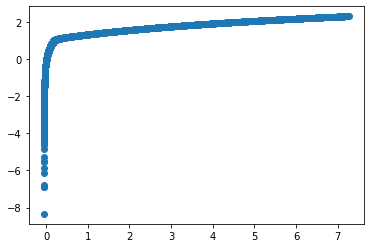

In [113]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(model_final(pb).cpu().data.numpy(),eb.T.squeeze().cpu().data.numpy())
plt.show()

In [107]:
np.log(np.abs(pb.cpu().data.numpy())).flatten()

array([0.6003134 , 2.0740824 , 0.09482794, ..., 2.2298036 , 0.55139816,
       2.16771   ], dtype=float32)